In [2]:
import random

if __name__=='__main__':
    n_trials = 400000
    
     registry=ftk.Registry()
 #   registry.register_all("direct%d.txt")
    
  #  [total_trials,n_hits]= registry.read([0,0])
    total_trials=0.0
    n_hits=0.0
    
    for iter in range(n_trials):
  #      if registry.is_kill_token_present(): break
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x*x + y*y < 1.0:
            n_hits += 1
        total_trials+=1
        
    print ('Total Trials=%(total_trials)d, hits=%(n_hits)d, estimate%(estimate)f'%{
        'total_trials':total_trials,
        'n_hits':n_hits,
        'estimate': 4.0 * n_hits / float(total_trials)})
    
 #   registry.write([total_trials,n_hits])


Total Trials=400000, hits=313898, estimate3.138980


n=0,n_trials=10
n=1,n_trials=20
n=2,n_trials=40
n=3,n_trials=80
n=4,n_trials=160
n=5,n_trials=320
n=6,n_trials=640
n=7,n_trials=1280
n=8,n_trials=2560
n=9,n_trials=5120
n=10,n_trials=10240
n=11,n_trials=20480


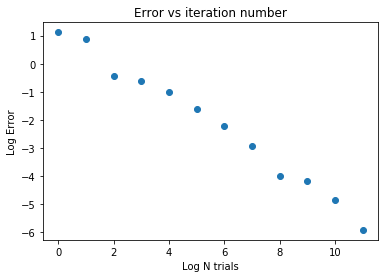

In [4]:
import random,math,matplotlib.pyplot as plt

n_trials=10
mult = 2

errors=[]
iterations=[]
for n in range(12):
    print ('n=%(n)d,n_trials=%(n_trials)d'%locals())
    error=0
    for i in range(20):
        n_hits=0
        for iter in range(n_trials):
            x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
            if x*x + y*y < 1.0:  n_hits += 1
        pi_approx=4.0 * n_hits / float(n_trials)
        error+=(math.pi-pi_approx)*(math.pi-pi_approx)
    n_trials *= mult
    errors.append(math.log(error))
    iterations.append(n)    
    
plt.plot(iterations, errors, 'o')
plt.xlabel('Log N trials')
plt.ylabel('Log Error')
plt.title('Error vs iteration number')
#plt.savefig('direct-plot.png')
plt.show()

In [19]:
import random, math, matplotlib.pyplot as plt

def float_range(lower,upper,step):
    return [step*i for i in range(lower,upper+1)]

# Calculate normalized errors, uisng the maximum as our normalization.
# Normalized errors range from 0 to 1
def normalize(xs):
    m=max(xs)
    return [x/m for x in xs]

def perform_markov(n_trials,delta):
    x, y = 1.0, 1.0
    n_hits=0
    n_reject=0
    
    for i in range(n_trials):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        else:
            n_reject+=1
        if x*x + y*y < 1.0: 
            n_hits += 1
    
    return (4.0 * n_hits / float(n_trials), n_reject/ float(n_trials))



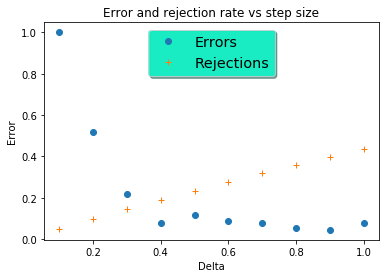

In [17]:
if __name__=='__main__':
    n=25
    errors=[]
    deltas=float_range(1,10,0.1)
    rejections=[]
    n_trials=400000
    for delta in deltas:
        sum_sq=0
        sum_reject=0
        for i in range(n):
            (result,reject)=perform_markov(n_trials,delta)
            error=result-math.pi
            sum_sq+=error*error
            sum_reject+=reject
        mean_sq=sum_sq/n
        mean_reject=sum_reject/n
        errors.append(mean_sq)
        rejections.append(mean_reject)
     
    plt.figure() 
   # plt.subplot(131)
    plt.plot(deltas, normalize(errors), 'o', label='Errors')
    plt.plot(deltas, rejections,'+', label='Rejections')
    plt.xlabel('Delta')
    plt.ylabel('Error')
    plt.title('Error and rejection rate vs step size')
    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    #legend.get_frame().set_facecolor('#00FFCC')    

    #plt.savefig('markov-pi.png')
    
    plt.show()

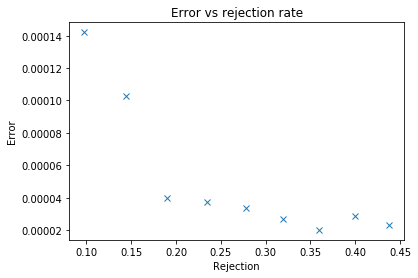

In [18]:
if __name__=='__main__':
    n=25
    errors=[]
    deltas=float_range(1,10,0.1)
    rejections=[]
    n_trials=400000
    for delta in deltas:
        sum_sq=0
        sum_reject=0
        for i in range(n):
            (result,reject)=perform_markov(n_trials,delta)
            error=result-math.pi
            sum_sq+=error*error
            sum_reject+=reject
        mean_sq=sum_sq/n
        mean_reject=sum_reject/n
        errors.append(mean_sq)
        rejections.append(mean_reject)
     
    plt.figure() 
#    plt.subplot(133)
    plt.plot(rejections[1:], errors[1:],'x')
    plt.xlabel('Rejection')
    plt.ylabel('Error')
    plt.title('Error vs rejection rate')
    plt.show()